<a href="https://colab.research.google.com/github/D-Soto/Coco/blob/main/Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

In [ ]:
df = pd.read_csv('/content/drive/My Drive/DS/data/cust_seg.csv', index_col = 'Customer Id')
df.drop(columns = 'Unnamed: 0', inplace = True)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
df.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [ ]:
df.shape

(850, 8)

In [ ]:
df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

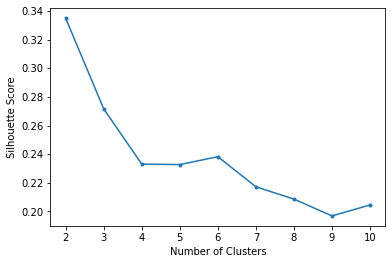

In [ ]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
 df['kmeans_cluster'] = kmeans.labels_

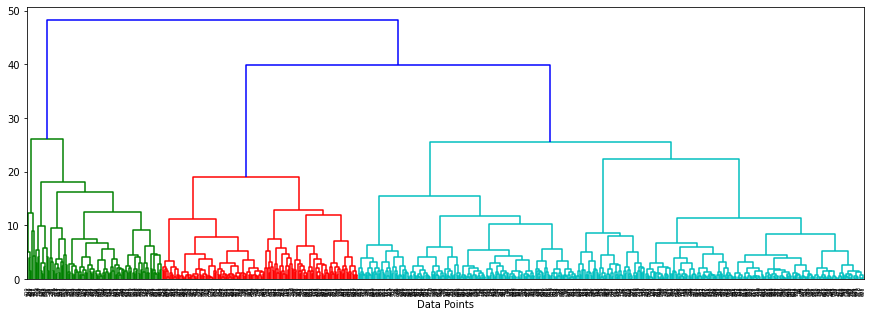

In [ ]:
plt.figure(figsize = (15, 5))
sch.dendrogram(sch.linkage(scaled_df, method = 'ward'))
plt.xlabel('Data Points');

In [ ]:
hc = AgglomerativeClustering(n_clusters = 3)
hc.fit(scaled_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [ ]:
 df['hc_cluster'] = hc.labels_

In [ ]:
dbs = DBSCAN(eps = 0.5, min_samples = 5).fit(scaled_df)

In [ ]:
df['dbs_cluster'] = dbs.labels_

In [ ]:
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,dbs_cluster
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,-1
2,47,1,26,100,4.582,8.218,0.0,12.8,-1
3,33,2,10,57,6.111,5.802,1.0,20.9,-1
4,29,2,4,19,0.681,0.516,0.0,6.3,1
5,47,1,31,253,9.308,8.908,0.0,7.2,-1


In [ ]:
for model in [kmeans, hc, dbs]:
  print('Silhouette Score for {}: {}'.format(model, silhouette_score(scaled_df, model.labels_)))
  print('-----------------')

Silhouette Score for KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0): 0.33496643365707623
-----------------
Silhouette Score for AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3): 0.26443271651400624
-----------------
Silhouette Score for DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None): -0.28649351883732704
-----------------


In [ ]:
scaled_df = pd.DataFrame(scaled_df)
scaled_df['labels'] = dbs.labels_
scaled_df.head()

,0,1,2,3,4,5,6,7,labels
0,0.768304,0.298793,-0.359007,-0.723102,-0.675699,-0.604284,-0.594950,-0.580528,-1
1,1.519090,-0.779325,2.647029,1.478707,1.431421,1.570620,-0.594950,0.372222,-1
2,-0.232744,0.298793,0.242201,0.309845,2.154119,0.835201,1.680814,1.559495,-1
3,-0.733267,0.298793,-0.659610,-0.723102,-0.412427,-0.773833,-0.594950,-0.580528,1
4,1.519090,-0.779325,3.398538,5.637681,3.665215,1.780653,-0.594950,-0.448609,-1


In [ ]:
scaled_dbs_df = scaled_df.loc[scaled_df['labels'] != -1, :]
silhouette_score(scaled_dbs_df.drop(columns = 'labels'), scaled_dbs_df['labels'])

0.14169860713369153

KMeans because it has the highest silhouette score.